In [1]:
from dask import delayed

@delayed
def inc(x):
    return x + 1

@delayed
def add(x, y):
    return x + y

In [2]:
x = inc(15)
y = inc(30)
total = add(x, y)

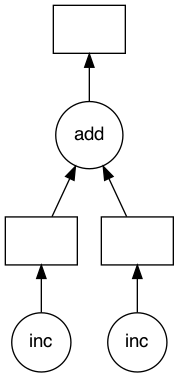

In [3]:
total.visualize()

In [4]:
total.compute()

47

In [5]:
%run prep.py -d accounts

Created CSV accounts in 4.09s
Created JSON accounts in 32.71s


In [6]:
import pandas as pd
import os

filenames = [os.path.join("data", "accounts.%d.csv" % i) for i in [0, 1, 2]]

filenames

['data/accounts.0.csv', 'data/accounts.1.csv', 'data/accounts.2.csv']

In [7]:
%%time

a, b, c = tuple(map(lambda f: pd.read_csv(f), filenames))

na, nb, nc = len(a), len(b), len(c)

total = sum([na, nb, nc])

print(total)

3000000
CPU times: user 524 ms, sys: 89.4 ms, total: 614 ms
Wall time: 616 ms


In [8]:
delayed_read_csv = delayed(pd.read_csv)
delayed_len = delayed(len)

a, b, c = map(delayed_read_csv, filenames)

na, nb, nc = map(delayed_len, [a, b, c])

delayed_sum = delayed(sum)

total = delayed_sum([na, nb, nc])

%time print(total.compute())

3000000
CPU times: user 574 ms, sys: 161 ms, total: 735 ms
Wall time: 332 ms


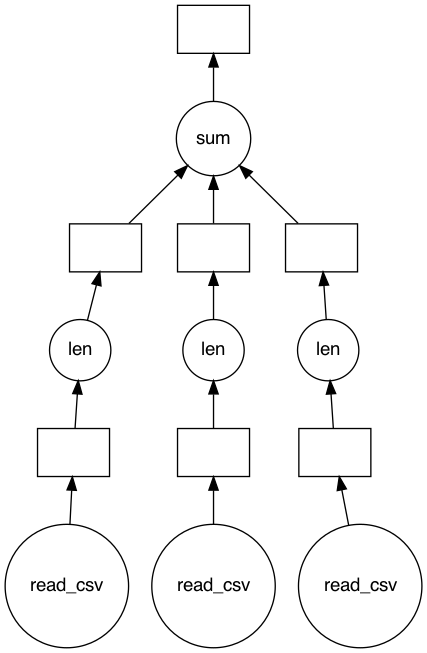

In [9]:
total.visualize()

In [10]:
import re

splitter = re.compile('\w+')

with open('sources.py', 'r') as f:
    data = f.read()

result = len(splitter.findall(data))
result

26

In [11]:
total.dask

HighLevelGraph with 7 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x1353c80a0>
 0. read_csv-5d9d1e69-4619-4e79-9e36-e37b725b0c0a
 1. len-d1771c0b-cfc5-404d-98c2-4e0ce3b49f2c
 2. read_csv-2f4ec74a-536a-410e-932c-ab5a92ae409c
 3. len-928b0f96-1d80-4eab-aa1d-9b275e790cc7
 4. read_csv-ca829a3e-d7d5-4fb5-8fd3-c4ef978ea9a3
 5. len-02d29ce5-6be2-4e0b-8572-64598c894029
 6. sum-3da59ac7-0ca8-431b-a541-d97e66e01765